In [1]:
from os import getcwd
from os.path import join
from pathlib import Path
import sys
sys.path.insert(0, join(Path(getcwd()).parent.absolute(), 'src'))
from sugeno_rules import classify, Chance
from utils import get_data
import metrics
import pandas as pd
import plotly.express as px

In [2]:
data_path = '../data/hcvdat0.csv'
df = get_data(data_path)
df.head()

,Category,Age,Sex,ALP,ALT,AST,BIL,GGT,Category_name
1,0,32,m,52.5,7.7,22.1,7.5,12.1,Blood Donor
2,0,32,m,70.3,18.0,24.7,3.9,15.6,Blood Donor
3,0,32,m,74.7,36.2,52.6,6.1,33.2,Blood Donor
4,0,32,m,52.0,30.6,22.6,18.9,33.8,Blood Donor
5,0,32,m,74.1,32.6,24.8,9.6,29.9,Blood Donor


In [3]:
df[['prediction', 'sugeno_value']] = df.apply(lambda x: classify(x, return_val=True), axis=1, result_type='expand')
df.head()

,Category,Age,Sex,ALP,ALT,AST,BIL,GGT,Category_name,prediction,sugeno_value
1,0,32,m,52.5,7.7,22.1,7.5,12.1,Blood Donor,0.0,0.100000
2,0,32,m,70.3,18.0,24.7,3.9,15.6,Blood Donor,0.0,0.100000
3,0,32,m,74.7,36.2,52.6,6.1,33.2,Blood Donor,0.0,0.850193
4,0,32,m,52.0,30.6,22.6,18.9,33.8,Blood Donor,0.0,0.334300
5,0,32,m,74.1,32.6,24.8,9.6,29.9,Blood Donor,0.0,0.100000


In [4]:
result_metrics = metrics.count_metrics(df['Category'], df['prediction'])
metrics.print_metrics('sugeno', *result_metrics)

sugeno
accuracy:	 0.8813008130081301
precision:	 0.35957875457875454
recall:		 0.34207049048512467
f1 score:	 0.3339126618389291


<AxesSubplot:>

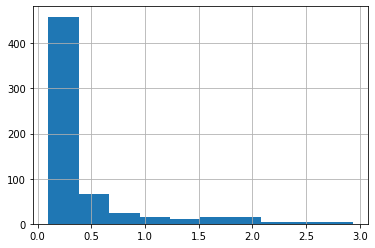

In [5]:
df['sugeno_value'].hist()

In [6]:
df = df.sort_values('sugeno_value')
fig = px.scatter(df, x='sugeno_value', y='Category', color='prediction')
fig.show()
